In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("hight-weight.csv")

In [3]:
df.head()

,Weight,Hight
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


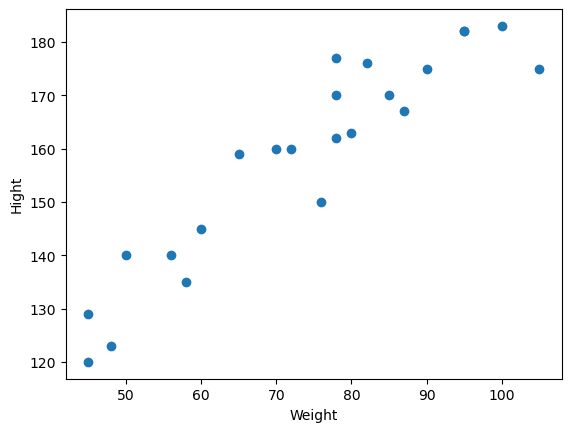

In [4]:
##Scatter Plot
plt.scatter(df['Weight'],df['Hight'])
plt.xlabel("Weight")
plt.ylabel("Hight")
plt.show()

In [5]:
#corelation
df.corr()

,Weight,Hight
Weight,1.000000,0.931142
Hight,0.931142,1.000000


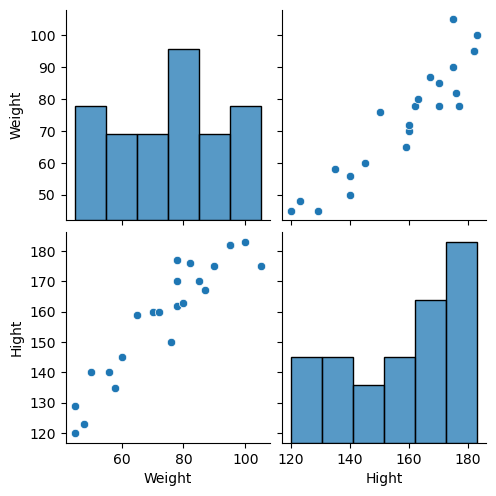

In [6]:
## Import Seborn for vesulization
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df)
plt.show()



In [7]:
df.head()

,Weight,Hight
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [8]:
##Independent and dependent features
X=df[['Weight']]## independent feature should be Data frame and 2 array
Y=df['Hight']##This variable can be in series or 1d array
np.array(X).reshape(-1,1)


array([[ 45],
       [ 58],
       [ 48],
       [ 60],
       [ 70],
       [ 78],
       [ 80],
       [ 90],
       [ 95],
       [ 78],
       [ 82],
       [ 95],
       [105],
       [100],
       [ 85],
       [ 78],
       [ 50],
       [ 65],
       [ 76],
       [ 87],
       [ 45],
       [ 56],
       [ 72]], dtype=int64)

In [9]:
np.array(Y).shape

(23,)

In [10]:
## Train test split
from sklearn.model_selection import train_test_split


In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
X_train.shape


(17, 1)

In [13]:
Y_train.shape


(17,)

In [14]:
##standerdization
from sklearn.preprocessing import StandardScaler

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [16]:
X_test=scaler.transform(X_test)

In [17]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [18]:
#Apply Linear Regresssion
from sklearn.linear_model import LinearRegression


In [19]:
regression=LinearRegression()

In [20]:
regression.fit(X_train,Y_train)

LinearRegression()

In [21]:
print("coefficient or slope:-",regression.coef_)
print("Intercept :-",regression.intercept_)

coefficient or slope:- [17.2982057]
Intercept :- 156.47058823529412


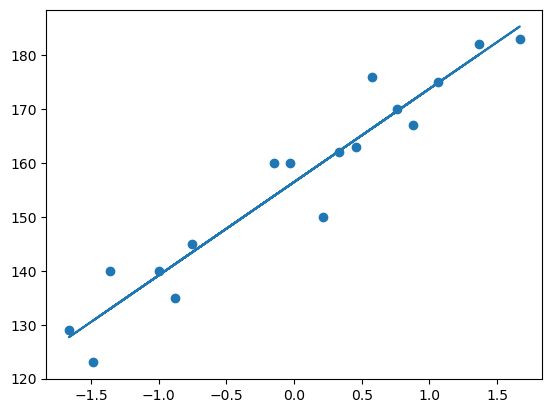

In [22]:
## plot training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [23]:
## prediction for test deta
import numpy as np
X_test=np.array(X_test)
Y_test=np.array(Y_test)
y_pred=regression.predict(X_test)#reshape(-1,1))
print("shape of Y_test",Y_test)
print("shape of y_pred:-",y_pred)

shape of Y_test [177 170 120 182 159 175]
shape of y_pred:- [162.26499721 162.26499721 127.68347133 180.07972266 148.64197186
 190.55897293]


In [24]:
## 1.predicted hight output=intercept +coef_(weights)
# 2. y_pred_test=156.05 +18.73(X_test)

In [25]:
## PErformence Metrix 
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse=mean_squared_error(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
rms=np.sqrt(mse)
print("Mean Squered Error is:-",mse)
print("Mean absolute Error is:-",mae)
print("Root Mean Squered Error:-",rms)

Mean Squered Error is:- 114.84069295228699
Mean absolute Error is:- 9.665125886795005
Root Mean Squered Error:- 10.716374991212605


In [28]:
## R2 score 
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)
score

0.7360826717981276

In [ ]:
#adjusted r2
